# Midterm: due 25th October


In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 5))
np.set_printoptions(precision=4)
%pwd

'C:\\Users\\Nelson Chung\\Desktop\\trial'

In [2]:
matplotlib inline

### Use the "names.zip" file

Q1) Unzip "names.zip" and read the 'yob1880.txt' file and show the information in the file. 

In [3]:
names1880 = pd.read_csv('names\\yob1880.txt', header=None, names=['name', 'sex', 'number'])
names1880.info

<bound method DataFrame.info of            name sex  number
0          Mary   F    7065
1          Anna   F    2604
2          Emma   F    2003
3     Elizabeth   F    1939
4        Minnie   F    1746
5      Margaret   F    1578
6           Ida   F    1472
7         Alice   F    1414
8        Bertha   F    1320
9         Sarah   F    1288
10        Annie   F    1258
11        Clara   F    1226
12         Ella   F    1156
13     Florence   F    1063
14         Cora   F    1045
15       Martha   F    1040
16        Laura   F    1012
17       Nellie   F     995
18        Grace   F     982
19       Carrie   F     949
20        Maude   F     858
21        Mabel   F     808
22       Bessie   F     794
23       Jennie   F     793
24     Gertrude   F     787
25        Julia   F     783
26       Hattie   F     769
27        Edith   F     768
28       Mattie   F     704
29         Rose   F     700
...         ...  ..     ...
1970      Philo   M       5
1971    Phineas   M       5
1972    Presley 

Q2) Show the sum of the births column by sex as the total numer of births in that year. (HINT: Dataframe - Groupby()

In [4]:
names1880.groupby('sex').number.sum()

sex
F     90993
M    110493
Name: number, dtype: int64

Q3) Since the data set is split into files by year, one of the first things to do is to assemble all of the data into a single DataFrame and further to add a year field. Please add your codes below. (Hint. This is easy to do using pandas.concat)

In [5]:
names_dataframe_list = []

for i in range(1880, 2011):
    file_path = 'names\\yob' + str(i) + '.txt'
    new_dataframe = pd.read_csv(file_path, header=None, names=['name', 'sex', 'number', 'year'])
    new_dataframe.year = i
    names_dataframe_list.append(new_dataframe)
    
names = pd.concat(names_dataframe_list, ignore_index=True)

In [6]:
names

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


Q4) With this data in hand, please aggreate the data at the year and sex level using groupby or pivot_table and plot total birth by sex and year. 

In [7]:
pivoted_yearsex = pd.pivot_table(names, index='year', columns='sex', values='number', aggfunc=sum)
pivoted_yearsex.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


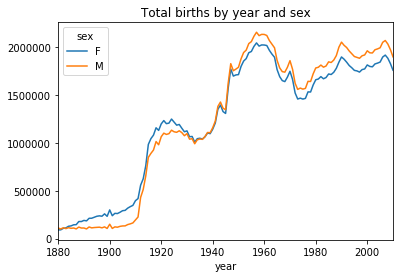

In [8]:
pivoted_yearsex.plot(title='Total births by year and sex', xlim=(1880, 2010))
plt.xlabel('year')
plt.legend(title='sex')
plt.show()

Let's insert a column 'prop' which the fraction of babies given each name relative to the total number of births. A 'prop' value of 0.02 would indicate that 2 out of every 100 babies was given a particular name.

Q5) Please group the data by year and sex (using groupby()), then add the new column to each group. 

In [9]:
gp = names.groupby(['year', 'sex'])
names2_dataframe_list = []

for i, table in gp:
    total = table.number.sum()
    table['prop'] = table.number / total
    print(i, table.shape, table.prop.sum())  #for eyeball checking only
    print(table.head())
    names2_dataframe_list.append(table)

names2 = pd.concat(names2_dataframe_list, ignore_index=True)

C:\Users\Nelson Chung\trial\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1880, 'F') (942, 5) 1.0
        name sex  number  year      prop
0       Mary   F    7065  1880  0.077643
1       Anna   F    2604  1880  0.028618
2       Emma   F    2003  1880  0.022013
3  Elizabeth   F    1939  1880  0.021309
4     Minnie   F    1746  1880  0.019188
(1880, 'M') (1058, 5) 0.9999999999999999
        name sex  number  year      prop
942     John   M    9655  1880  0.087381
943  William   M    9533  1880  0.086277
944    James   M    5927  1880  0.053641
945  Charles   M    5348  1880  0.048401
946   George   M    5126  1880  0.046392
(1881, 'F') (938, 5) 1.0
           name sex  number  year      prop
2000       Mary   F    6919  1881  0.075243
2001       Anna   F    2698  1881  0.029340
2002       Emma   F    2034  1881  0.022120
2003  Elizabeth   F    1852  1881  0.020140
2004   Margaret   F    1658  1881  0.018031
(1881, 'M') (997, 5) 1.0
         name sex  number  year      prop
2938     John   M    8769  1881  0.087039
2939  William   M    8524  1881  0.084607
29

(1895, 'F') (1808, 5) 1.0
            name sex  number  year      prop
36791       Mary   F   13446  1895  0.057552
36792       Anna   F    5949  1895  0.025463
36793      Helen   F    4023  1895  0.017219
36794   Margaret   F    3931  1895  0.016826
36795  Elizabeth   F    3603  1895  0.015422
(1895, 'M') (1241, 5) 1.0
          name sex  number  year      prop
38599     John   M    8321  1895  0.070879
38600  William   M    7277  1895  0.061986
38601    James   M    5335  1895  0.045444
38602   George   M    4289  1895  0.036534
38603  Charles   M    3633  1895  0.030946
(1896, 'F') (1825, 5) 1.0000000000000002
           name sex  number  year      prop
39840      Mary   F   13811  1896  0.058048
39841      Anna   F    5860  1896  0.024630
39842     Helen   F    4392  1896  0.018460
39843  Margaret   F    4051  1896  0.017026
39844      Ruth   F    3905  1896  0.016413
(1896, 'M') (1266, 5) 1.0
          name sex  number  year      prop
41665     John   M    8139  1896  0.068066
416

(1911, 'M') (2000, 5) 1.0000000000000002
          name sex  number  year      prop
96441     John   M   13445  1911  0.059508
96442  William   M   10595  1911  0.046894
96443    James   M    9951  1911  0.044043
96444   George   M    6586  1911  0.029150
96445   Robert   M    6525  1911  0.028880
(1912, 'F') (3443, 5) 0.9999999999999998
           name sex  number  year      prop
98441      Mary   F   32295  1912  0.057883
98442     Helen   F   16130  1912  0.028910
98443   Dorothy   F   12642  1912  0.022658
98444  Margaret   F   12532  1912  0.022461
98445      Ruth   F   11274  1912  0.020207
(1912, 'M') (2906, 5) 1.0
           name sex  number  year      prop
101884     John   M   24586  1912  0.057187
101885  William   M   19625  1912  0.045647
101886    James   M   17646  1912  0.041044
101887   Robert   M   12835  1912  0.029854
101888   Joseph   M   12062  1912  0.028056
(1913, 'F') (3705, 5) 1.0
            name sex  number  year      prop
104790      Mary   F   36631  1913 

           name sex  number  year      prop
260290   Robert   M   60649  1928  0.054781
260291     John   M   53736  1928  0.048537
260292    James   M   52743  1928  0.047640
260293  William   M   49088  1928  0.044339
260294  Charles   M   31223  1928  0.028202
(1929, 'F') (5275, 5) 1.0000000000000002
            name sex  number  year      prop
265015      Mary   F   63502  1929  0.056887
265016     Betty   F   36665  1929  0.032846
265017   Dorothy   F   31467  1929  0.028189
265018     Helen   F   20994  1929  0.018807
265019  Margaret   F   19196  1929  0.017196
(1929, 'M') (4535, 5) 1.0
           name sex  number  year      prop
270290   Robert   M   59798  1929  0.055635
270291    James   M   52100  1929  0.048473
270292     John   M   52068  1929  0.048443
270293  William   M   47782  1929  0.044455
270294  Charles   M   29916  1929  0.027833
(1930, 'F') (5249, 5) 1.0
            name sex  number  year      prop
274825      Mary   F   64110  1930  0.056960
274826     Betty   

(1945, 'F') (5247, 5) 1.0
            name sex  number  year      prop
412290      Mary   F   59285  1945  0.045349
412291     Linda   F   41485  1945  0.031733
412292   Barbara   F   38283  1945  0.029284
412293  Patricia   F   35849  1945  0.027422
412294     Carol   F   30404  1945  0.023257
(1945, 'M') (3786, 5) 0.9999999999999999
           name sex  number  year      prop
417537    James   M   74475  1945  0.055321
417538   Robert   M   69966  1945  0.051972
417539     John   M   66158  1945  0.049143
417540  William   M   50226  1945  0.037309
417541  Richard   M   46045  1945  0.034203
(1946, 'F') (5686, 5) 1.0
            name sex  number  year      prop
421323      Mary   F   67437  1946  0.042938
421324     Linda   F   52702  1946  0.033556
421325  Patricia   F   46272  1946  0.029462
421326   Barbara   F   45103  1946  0.028718
421327     Carol   F   34246  1946  0.021805
(1946, 'M') (4013, 5) 1.0
           name sex  number  year      prop
427009    James   M   87382  1946

           name sex  number  year      prop
579699    David   M   85917  1960  0.040288
579700  Michael   M   84192  1960  0.039479
579701    James   M   76860  1960  0.036041
579702     John   M   76125  1960  0.035696
579703   Robert   M   72359  1960  0.033930
(1961, 'F') (7522, 5) 1.0000000000000002
         name sex  number  year      prop
584287   Mary   F   47651  1961  0.023627
584288   Lisa   F   42685  1961  0.021165
584289  Susan   F   37517  1961  0.018603
584290  Linda   F   35558  1961  0.017631
584291  Karen   F   34684  1961  0.017198
(1961, 'M') (4647, 5) 1.0
           name sex  number  year      prop
591809  Michael   M   86898  1961  0.040958
591810    David   M   84758  1961  0.039949
591811     John   M   79880  1961  0.037650
591812    James   M   75874  1961  0.035762
591813   Robert   M   72893  1961  0.034357
(1962, 'F') (7577, 5) 1.0
         name sex  number  year      prop
596456   Lisa   F   46090  1962  0.023439
596457   Mary   F   43488  1962  0.022116
5

(1977, 'F') (11316, 5) 1.0000000000000002
            name sex  number  year      prop
808158  Jennifer   F   58951  1977  0.038465
808159   Melissa   F   26880  1977  0.017539
808160       Amy   F   26729  1977  0.017441
808161   Jessica   F   24838  1977  0.016207
808162   Heather   F   23766  1977  0.015507
(1977, 'M') (6847, 5) 1.0
               name sex  number  year      prop
819474      Michael   M   67590  1977  0.041144
819475        Jason   M   55623  1977  0.033860
819476  Christopher   M   46727  1977  0.028444
819477        David   M   40530  1977  0.024672
819478        James   M   40019  1977  0.024361
(1978, 'F') (11462, 5) 1.0
            name sex  number  year      prop
826321  Jennifer   F   56307  1978  0.036772
826322   Melissa   F   28323  1978  0.018497
826323   Jessica   F   26102  1978  0.017046
826324       Amy   F   23219  1978  0.015164
826325   Heather   F   22265  1978  0.014540
(1978, 'M') (6755, 5) 1.0
               name sex  number  year      prop
837

(1992, 'M') (9806, 5) 1.0000000000000002
                name sex  number  year      prop
1134558      Michael   M   54364  1992  0.027240
1134559  Christopher   M   42459  1992  0.021275
1134560      Matthew   M   37730  1992  0.018905
1134561       Joshua   M   36204  1992  0.018140
1134562       Andrew   M   30528  1992  0.015296
(1993, 'F') (15792, 5) 1.0
             name sex  number  year      prop
1144364   Jessica   F   34973  1993  0.019346
1144365    Ashley   F   34844  1993  0.019274
1144366     Sarah   F   24220  1993  0.013398
1144367  Samantha   F   23659  1993  0.013087
1144368     Emily   F   23589  1993  0.013048
(1993, 'M') (10154, 5) 0.9999999999999999
                name sex  number  year      prop
1160156      Michael   M   49551  1993  0.025285
1160157  Christopher   M   38222  1993  0.019504
1160158      Matthew   M   35772  1993  0.018254
1160159       Joshua   M   33574  1993  0.017132
1160160        Tyler   M   29798  1993  0.015205
(1994, 'F') (15745, 5) 0.9

             name sex  number  year      prop
1587338      Emma   F   18765  2008  0.009962
1587339  Isabella   F   18564  2008  0.009855
1587340     Emily   F   17397  2008  0.009236
1587341    Olivia   F   17030  2008  0.009041
1587342       Ava   F   17007  2008  0.009029
(2008, 'M') (14590, 5) 1.0
            name sex  number  year      prop
1607754    Jacob   M   22507  2008  0.011075
1607755  Michael   M   20524  2008  0.010099
1607756    Ethan   M   20174  2008  0.009927
1607757   Joshua   M   19133  2008  0.009414
1607758   Daniel   M   18935  2008  0.009317
(2009, 'F') (20123, 5) 1.0
             name sex  number  year      prop
1622344  Isabella   F   22222  2009  0.012159
1622345      Emma   F   17830  2009  0.009756
1622346    Olivia   F   17374  2009  0.009506
1622347    Sophia   F   16869  2009  0.009230
1622348       Ava   F   15826  2009  0.008659
(2009, 'M') (14479, 5) 1.0
              name sex  number  year      prop
1642467      Jacob   M   21036  2009  0.010660
164

In [10]:
names2

,name,sex,number,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


Let's extract a subset of the data to facilitate further analysis.

Q6) Please extract the top 1000 names for each sex/year cominations.

In [11]:
gp2 = names2.groupby(['year', 'sex'])
top1000_dataframe_list = []

for i, table in gp2:
    top1000_by_yearsex = table.sort_values(by='number', ascending=False).iloc[:1000, :]
    top1000_dataframe_list.append(top1000_by_yearsex)

top1000 = pd.concat(top1000_dataframe_list)

In [12]:
top1000

,name,sex,number,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


### Analyzing naming trends

With the full data set and Top 1,000 data set in hand, we can start analyzing various naming trends of interst.

Q7) Split the Top 1,000 names into the boy and girl proportions.

In [13]:
top1000_boy = top1000[top1000.sex == 'M']
top1000_girl = top1000[top1000.sex == 'F']

In [14]:
top1000_boy.head()

,name,sex,number,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392


In [15]:
top1000_girl.head()

,name,sex,number,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


Q8) Let's form a pivot table of the total number of births by year and name.

In [16]:
pivot_names = top1000.pivot_table(index='year', columns='name', values='number', aggfunc=sum)
pivot_names.head()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


Q9) We would like to investigate the names of 'John', 'Harry', 'Mary', 'Marilyn'. Please plot the number of births over time for the names (draw four figures).

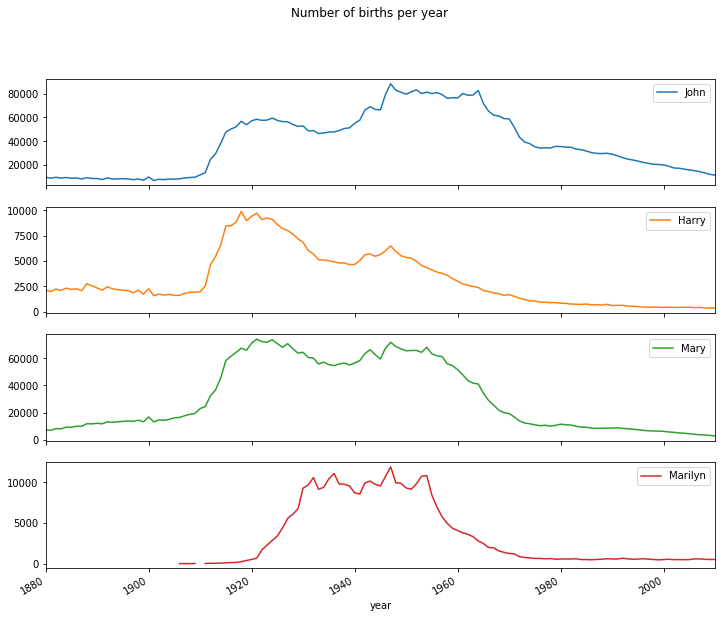

In [17]:
target = pivot_names.loc[:, ['John', 'Harry', 'Mary', 'Marilyn']]
target.plot(subplots=True, figsize=(12, 10), title='Number of births per year', xlim=(1880, 2010), sharex=True)
plt.show()

#### Measuring the increase in naming diversity

One explanation for the decrease in the plots above (Q8) is that fewer parents are choosing comman names for their children. This hypothesis can be explored and confirmed in the data. 

Q10) Please plot the proportion of births represened by the top 1000 most popular names by year and sex. 

In [18]:
top1000_by_yearsex = top1000.pivot_table(index='year', columns='sex', values='prop', aggfunc=sum)
top1000_by_yearsex.head()

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539


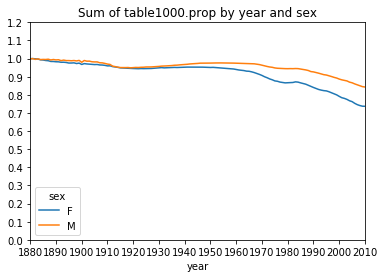

In [19]:
top1000_by_yearsex.plot(title='Sum of table1000.prop by year and sex', xlim=(1880, 2010), xticks=range(1880, 2011, 10), 
                        ylim=(0, 1.2), yticks=np.linspace(0, 1.2, 13))
plt.show()

Q11) Another intersting measure is the number of distinct names, taken in order of popularity from highest to lowest, in the top 
50% of births. Please plot number of popular names in top 50% for male and femail.

In [20]:
def top50p(group):
    cumprop = group.sort_values(by='prop', ascending=False).prop.cumsum()
    return int(cumprop.searchsorted(0.5) + 1)

top50_number = top1000.groupby(['year', 'sex']).apply(top50p).unstack()
top50_number.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


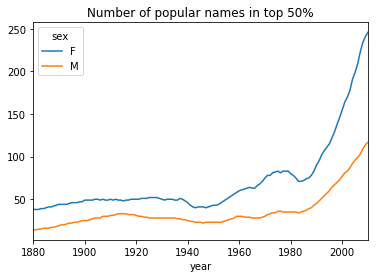

In [21]:
top50_number.plot(title='Number of popular names in top 50%', xlim=(1880, 2010))
plt.show()

#### The "Last letter" Revolution

In 2007, a baby name researcher Laura Wattenberg pointed out on her website (http://www.babynamewizard.com) that the distribution of boy names by final letter has changed significanlty over the last 100 years. 

Q12) To see this, please aggregate all of the births in the full data set by year, sex, and final letter.

In [22]:
def getfinalletter(name):
    return name[-1]

table_finalletter = pd.DataFrame(names2, copy=True, columns=['name', 'sex', 'number', 'year', 'prop', 'finalletter'])
table_finalletter.finalletter = names2.name.apply(getfinalletter)
pivot_finalletter = table_finalletter.pivot_table(index='finalletter', columns=['year', 'sex'], values='number', aggfunc=sum)
pivot_finalletter

year            1880              1881              1882              1883  \
sex                F        M        F        M        F        M        F   
finalletter                                                                  
a            31446.0    776.0  31581.0    767.0  36536.0    773.0  38330.0   
b                NaN    509.0      NaN    470.0      NaN    506.0      NaN   
c                NaN    349.0      NaN    331.0      5.0    349.0      5.0   
d              609.0   9177.0    607.0   8387.0    734.0   9702.0    810.0   
e            33378.0  13493.0  34080.0  12406.0  40399.0  14613.0  41914.0   
f                NaN    108.0      NaN     83.0      NaN    135.0      NaN   
g                7.0    147.0      5.0    146.0     12.0    146.0      8.0   
h             4863.0   4049.0   4784.0   3766.0   5567.0   4176.0   5701.0   
i               61.0    200.0     78.0    206.0     81.0    207.0     76.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0   4720.0     15.0   4149.0     11.0   4723.0     17.0   
l             2541.0   5090.0   2911.0   4571.0   3527.0   5427.0   3848.0   
m               58.0  11260.0     57.0  10217.0     81.0  11255.0     86.0   
n             3008.0  16929.0   2959.0  15436.0   3576.0  17003.0   3837.0   
o               30.0    933.0     49.0    800.0     35.0    926.0     47.0   
p                NaN    282.0      NaN    271.0      NaN    308.0      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0   7454.0    417.0   7273.0    590.0   7988.0    640.0   
s             1391.0  18453.0   1316.0  16371.0   1637.0  18240.0   1794.0   
t             2152.0   6949.0   2165.0   6228.0   2399.0   7081.0   2554.0   
u              380.0     25.0    427.0     26.0    410.0     10.0    444.0   
v                NaN     33.0      NaN     18.0      NaN     43.0      NaN   
w                NaN    853.0      5.0    748.0      NaN    875.0      NaN   
x                NaN    304.0      NaN    267.0      NaN    355.0      7.0   
y            10469.0   8371.0  10404.0   7803.0  12145.0   8815.0  12063.0   
z              106.0     29.0     95.0      8.0    106.0     31.0    141.0   

year                     1884             ...         2006            \
sex                M        F        M    ...            F         M   
finalletter                               ...                          
a              757.0  43680.0    817.0    ...     753391.0   36156.0   
b              452.0      NaN    496.0    ...        367.0   42600.0   
c              299.0      NaN    319.0    ...        633.0   26635.0   
d             8796.0    916.0   9856.0    ...       3600.0   51410.0   
e            13191.0  48089.0  14637.0    ...     330236.0  142999.0   
f              106.0      NaN    131.0    ...         60.0    1968.0   
g              135.0     24.0    160.0    ...        463.0    1929.0   
h             3925.0   6602.0   4242.0    ...     134247.0   98477.0   
i              167.0     84.0    158.0    ...      52887.0   33558.0   
j                NaN      NaN      NaN    ...        134.0    1241.0   
k             4387.0     21.0   4770.0    ...        625.0   42537.0   
l             5100.0   4808.0   5604.0    ...      54637.0  156234.0   
m            10114.0     79.0  10732.0    ...       4294.0   42503.0   
n            15867.0   4507.0  17157.0    ...     253359.0  720998.0   
o              812.0     74.0    939.0    ...       2095.0   96350.0   
p              286.0      NaN    275.0    ...         42.0    2721.0   
q                NaN      NaN      NaN    ...         19.0     430.0   
r             7510.0    718.0   8983.0    ...      35730.0  176490.0   
s            16544.0   2039.0  17712.0    ...      28080.0  143232.0   
t             6754.0   2825.0   7008.0    ...      10840.0   43553.0   
u               16.0    490.0     15.0    ...        780.0    2201.0   
v        

Q13) Plot a proportion of boy names ending in each letter in 2010.

In [23]:
subtable = pivot_finalletter.loc[:, [1910, 1960, 2010]]
subtable.index.name = 'last_letter'
letter_prop = subtable / subtable.sum()
letter_prop.columns = letter_prop.columns.swaplevel(0, 1)
letter_prop.head()

sex,F,M,F,M,F,M
year,1910,1910,1960,1960,2010,2010
last_letter,,,,,,
a,0.273390,0.005031,0.341853,0.002440,0.381240,0.014980
b,NaN,0.002116,0.000343,0.001834,0.000256,0.020470
c,0.000013,0.002482,0.000024,0.007257,0.000538,0.012181
d,0.017028,0.113858,0.001844,0.122908,0.001482,0.023387
e,0.336941,0.147556,0.215133,0.083853,0.178415,0.067959


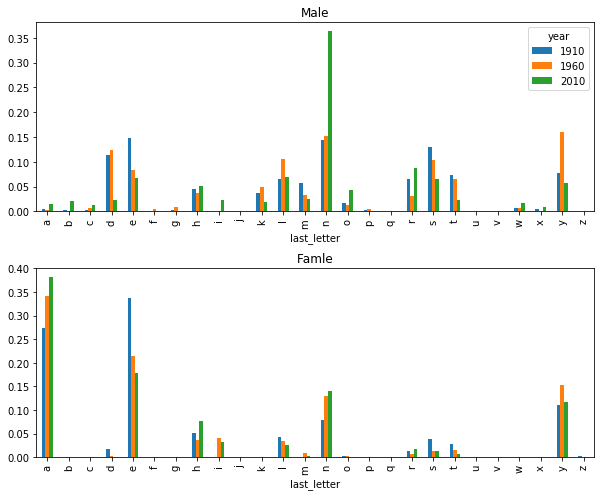

In [24]:
fig = plt.figure
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop.loc[:, 'M'].plot(kind='bar', ax=axes[0], title='Male')
letter_prop.loc[:, 'F'].plot(kind='bar', ax=axes[1], title='Famle', legend=False)
plt.subplots_adjust(hspace=0.3)
plt.show()

Q14) Plot a proportion of boy born with names ending in d/n/y over time.

In [25]:
lastletter_prop = pivot_finalletter / pivot_finalletter.sum()
table_dny = lastletter_prop.loc[['d', 'n', 'y'], lastletter_prop.columns.get_level_values(1) == 'M'].T
table_dny.reset_index(inplace=True)
table_dny.drop(columns='sex', inplace=True)
table_dny.set_index('year', inplace=True)
table_dny.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


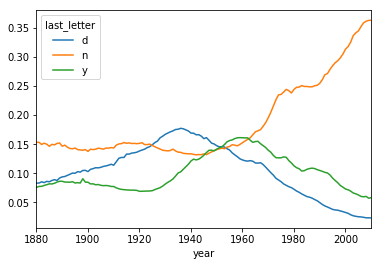

In [26]:
table_dny.plot(xlim=(1880, 2010))
plt.show()

#### Boy names that became girl names (and vice versa)

Another fun trend is looking at boy names that were more popular with one sex eariler in the sample but have "changed sexes" in the present. One example is the name "Lesley" or "Leslie". 

Q15) With the top 1000 dataset, please compute the list of names occuring in the dataset starting with 'lesl'. 

In [27]:
top1000_lesl = top1000[top1000.name.str.startswith('Lesl')]
top1000_lesl.groupby('name').number.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: number, dtype: int64

Q16) Let's filter down to just the names in Q15 and sum births grouped by name to see the relative frequencies. Then, please aggregate by sex and year and normalize within year. Finally, please make a plot of the breadkown by sex over time. 

In [28]:
lesl_table = top1000_lesl.pivot_table(index='year', columns='sex', values='number', aggfunc=sum)
lesl_total = lesl_table.sum(axis=1, skipna=True)
lesl_table.F = lesl_table.F / lesl_total
lesl_table.M = lesl_table.M / lesl_total
lesl_table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
1885,0.075758,0.924242
1886,0.055556,0.944444
1887,0.067416,0.932584
1888,0.116162,0.883838


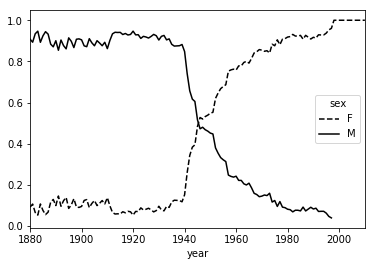

In [29]:
lesl_table.plot(style={'M': 'k-', 'F': 'k--'}, xlim=(1880, 2010))

### Use the "foods.json" file

Q17) Using the "foods.json" file, plot a median values by food group("fgroup") for 'Protein'.

In [30]:
foods = pd.read_json('foods.json')
foods

,description,group,id,manufacturer,nutrients,portions,tags
0,"Cheese, caraway",Dairy and Egg Products,1008,,"[{'value': 25.18, 'units': 'g', 'description':...","[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]",[]
1,"Cheese, cheddar",Dairy and Egg Products,1009,,"[{'value': 24.9, 'units': 'g', 'description': ...","[{'amount': 1, 'unit': 'cup, diced', 'grams': ...",[]
2,"Cheese, edam",Dairy and Egg Products,1018,,"[{'value': 4.22, 'units': 'g', 'description': ...","[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...",[]
3,"Cheese, feta",Dairy and Egg Products,1019,,"[{'value': 5.2, 'units': 'g', 'description': '...","[{'amount': 1, 'unit': 'cup, crumbled', 'grams...",[]
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,,"[{'value': 3.27, 'units': 'g', 'description': ...","[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]",[]
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,,"[{'value': 3.7199999999999998, 'units': 'g', '...","[{'amount': 1, 'unit': 'cup, diced', 'grams': ...",[]
6,"Cheese, romano",Dairy and Egg Products,1038,,"[{'value': 31.8, 'units': 'g', 'description': ...","[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...",[]
7,"Cheese, roquefort",Dairy and Egg Products,1039,,"[{'value': 21.54, 'units': 'g', 'description':...","[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...",[]
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,,"[{'value': 16.41, 'units': 'g', 'description':...","[{'amount': 1, 'unit': 'cup, diced', 'grams': ...",[]
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,,"[{'value': 2.96, 'units': 'g', 'description': ...","[{'amount': 1, 'unit': 'cup', 'grams': 242.0},...",[]


In [31]:
nutrients_dataframe_list = []

for i, row in foods.iterrows():
    row_nutrients_table = pd.DataFrame(row.nutrients)
    row_nutrients_table.rename(columns={'description': 'nutrients'}, inplace=True)
    row_nutrients_table['description'] = row.description
    row_nutrients_table['group'] = row.group
    row_nutrients_table['id'] = row.id
    row_nutrients_table['group'] = row.group   
    row_nutrients_table['row_number'] = i
    nutrients_dataframe_list.append(row_nutrients_table)

nutrients_table = pd.concat(nutrients_dataframe_list, ignore_index=True)

In [32]:
nutrients_table

,nutrients,group,units,value,description,id,row_number
0,Protein,Dairy and Egg Products,g,25.180,"Cheese, caraway",1008,0
1,Total lipid (fat),Dairy and Egg Products,g,29.200,"Cheese, caraway",1008,0
2,"Carbohydrate, by difference",Dairy and Egg Products,g,3.060,"Cheese, caraway",1008,0
3,Ash,Dairy and Egg Products,g,3.280,"Cheese, caraway",1008,0
4,Energy,Dairy and Egg Products,kcal,376.000,"Cheese, caraway",1008,0
5,Water,Dairy and Egg Products,g,39.280,"Cheese, caraway",1008,0
6,Energy,Dairy and Egg Products,kJ,1573.000,"Cheese, caraway",1008,0
7,"Fiber, total dietary",Dairy and Egg Products,g,0.000,"Cheese, caraway",1008,0
8,"Calcium, Ca",Dairy and Egg Products,mg,673.000,"Cheese, caraway",1008,0
9,"Iron, Fe",Dairy and Egg Products,mg,0.640,"Cheese, caraway",1008,0


In [33]:
print('Total number of duplicated input = ' + str(nutrients_table.duplicated().sum()))
print('Drop the duplicated item')
nutrients_table.drop_duplicates(inplace=True)
nutrients_table

Total number of duplicated input = 14179
Drop the duplicated item


,nutrients,group,units,value,description,id,row_number
0,Protein,Dairy and Egg Products,g,25.180,"Cheese, caraway",1008,0
1,Total lipid (fat),Dairy and Egg Products,g,29.200,"Cheese, caraway",1008,0
2,"Carbohydrate, by difference",Dairy and Egg Products,g,3.060,"Cheese, caraway",1008,0
3,Ash,Dairy and Egg Products,g,3.280,"Cheese, caraway",1008,0
4,Energy,Dairy and Egg Products,kcal,376.000,"Cheese, caraway",1008,0
5,Water,Dairy and Egg Products,g,39.280,"Cheese, caraway",1008,0
6,Energy,Dairy and Egg Products,kJ,1573.000,"Cheese, caraway",1008,0
7,"Fiber, total dietary",Dairy and Egg Products,g,0.000,"Cheese, caraway",1008,0
8,"Calcium, Ca",Dairy and Egg Products,mg,673.000,"Cheese, caraway",1008,0
9,"Iron, Fe",Dairy and Egg Products,mg,0.640,"Cheese, caraway",1008,0


In [34]:
pivot_nutrients_table = nutrients_table.pivot_table(index='group', columns='nutrients', values='value', aggfunc=np.median)
pivot_nutrients_table.loc[:, 'Protein']

group
Baby Foods                            2.370
Baked Products                        6.155
Beef Products                        25.610
Beverages                             0.070
Breakfast Cereals                     7.000
Cereal Grains and Pasta               8.410
Dairy and Egg Products               12.400
Ethnic Foods                         11.700
Fast Foods                           11.730
Fats and Oils                         0.160
Finfish and Shellfish Products       20.080
Fruits and Fruit Juices               0.605
Lamb, Veal, and Game Products        23.320
Legumes and Legume Products          10.620
Meals, Entrees, and Sidedishes        5.980
Nut and Seed Products                15.360
Pork Products                        21.785
Poultry Products                     23.955
Restaurant Foods                     10.770
Sausages and Luncheon Meats          15.000
Snacks                                8.100
Soups, Sauces, and Gravies            1.720
Spices and Herbs          

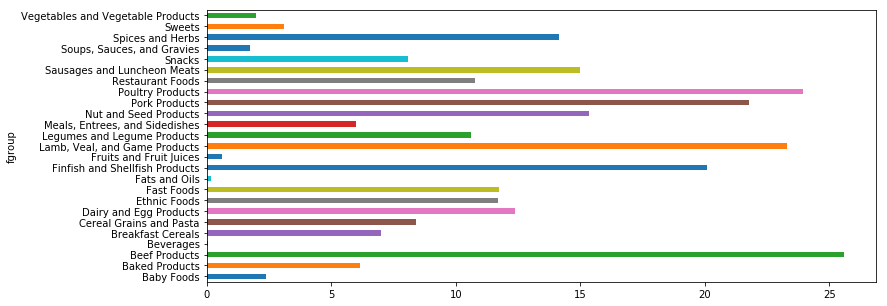

In [35]:
pivot_nutrients_table.loc[:, 'Protein'].plot(kind='barh', figsize=(12, 5))
plt.ylabel('fgroup')
plt.show()

Q18) Plot a median values by food group('fgroup') and nutrient('nutrient').

In [36]:
pivot_nutrients_table.head()

nutrients,Adjusted Protein,Alanine,"Alcohol, ethyl",Arginine,Ash,Aspartic acid,Beta-sitosterol,Betaine,Caffeine,"Calcium, Ca",...,"Vitamin C, total ascorbic acid",Vitamin D,Vitamin D (D2 + D3),Vitamin D2 (ergocalciferol),Vitamin D3 (cholecalciferol),Vitamin E (alpha-tocopherol),"Vitamin E, added",Vitamin K (phylloquinone),Water,"Zinc, Zn"
group,,,,,,,,,,,,,,,,,,,,,
Baby Foods,NaN,0.085,0.0,0.1040,0.62,0.2200,0.0,0.60,0.0,62.0,...,9.60,37.0,0.9,NaN,0.0,0.84,0.41,5.3,81.960,0.590
Baked Products,NaN,0.248,0.0,0.2985,1.80,0.3965,17.0,20.00,0.0,51.0,...,0.00,0.0,0.0,NaN,NaN,0.47,0.00,4.4,18.075,0.660
Beef Products,NaN,1.550,0.0,1.6670,1.06,2.3605,NaN,13.90,0.0,12.0,...,0.00,5.0,0.1,NaN,0.1,0.28,0.00,1.5,62.015,5.390
Beverages,NaN,0.003,0.0,0.0000,0.20,0.0050,NaN,0.10,0.0,8.0,...,0.25,0.0,0.0,1.0,NaN,0.00,0.00,0.0,87.000,0.040
Breakfast Cereals,NaN,0.311,0.0,0.2800,2.39,0.4650,NaN,13.75,0.0,47.0,...,0.10,68.0,1.7,NaN,3.7,0.55,0.00,1.2,3.760,2.885


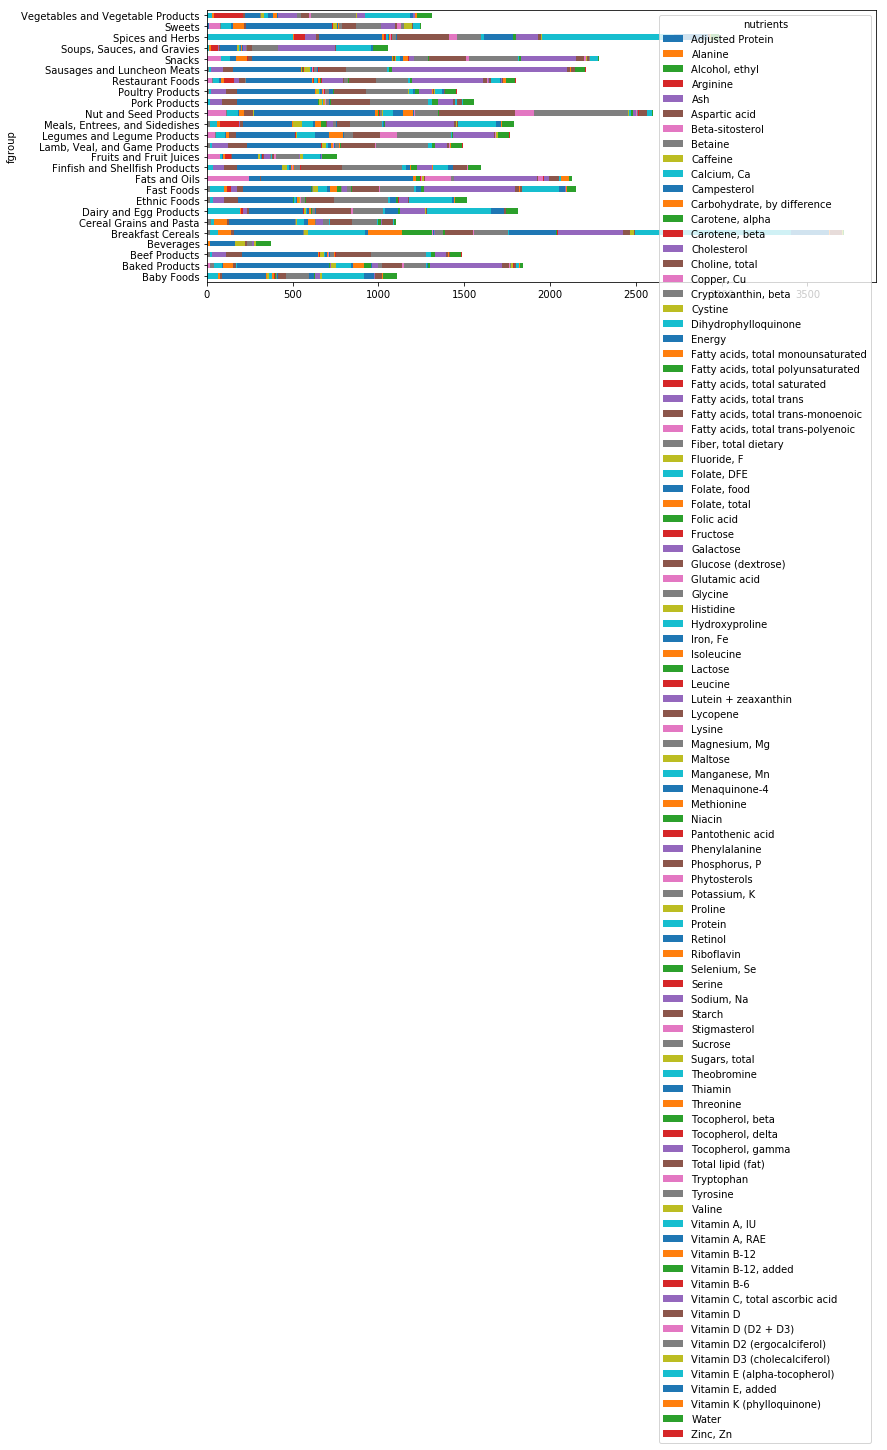

In [37]:
pivot_nutrients_table.plot(kind='barh', stacked=True, figsize=(12, 5))
plt.ylabel('fgroup')
plt.show()

Q19) Write codes to find which food is most dense in each nutrient.

In [47]:
nutrients_table.pivot_table(index='nutrients', columns='description', values='value', aggfunc=sum).apply(np.argmax, axis=1)

nutrients
Adjusted Protein                                 Baking chocolate, unsweetened, squares
Alanine                                               Gelatins, dry powder, unsweetened
Alcohol, ethyl                        Alcoholic beverage, distilled, all (gin, rum, ...
Arginine                                                   Seeds, sesame flour, low-fat
Ash                                              Desserts, rennin, tablets, unsweetened
Aspartic acid                                                       Soy protein isolate
Beta-sitosterol                       Oil, vegetable, Natreon canola, high stability...
Betaine                                                                Quinoa, uncooked
Caffeine                                              Tea, instant, unsweetened, powder
Calcium, Ca                           Leavening agents, baking powder, double-acting...
Campesterol                                                                 Oil, canola
Carbohydrate, by diffe

Q20) Write a code to collect stock prices (at least a week) for a company from a website. (You can freely choose a website except Naver.) 

In [39]:
from pandas.io.parsers import TextParser
from urllib.request import urlopen
from lxml.html import parse

In [40]:
url = r'https://finance.yahoo.com/quote/AAPL/history?p=AAPL'

In [41]:
doc = parse(urlopen(url)).getroot()
prices = doc.findall('.//table')[0]
rows = prices.findall('.//tr')

In [42]:
def _unpack(row, kind='td'):
    elts = row.findall('.//%s'%kind)
    return [val.text_content() for val in elts]

def parse_data(table):
    rows = table.findall('.//tr')
    header = _unpack(rows[0], kind='td')
    data = [_unpack(r) for r in rows[1:]]
    return TextParser(data, names=header).get_chunk()

In [43]:
prices_data = parse_data(prices)

In [44]:
prices_data.columns=['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
prices_data.dropna(thresh=6, inplace=True)
prices_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Oct 24, 2018",222.60,224.23,214.54,215.09,215.09,"40,771,100"
1,"Oct 23, 2018",215.83,223.25,214.70,222.73,222.73,"38,767,800"
2,"Oct 22, 2018",219.79,223.36,218.94,220.65,220.65,"28,792,100"
3,"Oct 19, 2018",218.06,221.26,217.43,219.31,219.31,"33,078,700"
4,"Oct 18, 2018",217.86,219.74,213.00,216.02,216.02,"32,581,300"
5,"Oct 17, 2018",222.30,222.64,219.34,221.19,221.19,"22,885,400"
6,"Oct 16, 2018",218.93,222.99,216.76,222.15,222.15,"29,184,000"
7,"Oct 15, 2018",221.16,221.83,217.27,217.36,217.36,"30,791,000"
8,"Oct 12, 2018",220.42,222.88,216.84,222.11,222.11,"40,337,900"
9,"Oct 11, 2018",214.52,219.50,212.32,214.45,214.45,"53,124,400"
